Teste

In [2]:
# Imports
#%pip install pandas
#%pip install pyarrow
#%pip install fastparquet
#%pip install prettytable
import prettytable
import pandas as pd
from collections import defaultdict
import seaborn as sns
from prettytable import PrettyTable

In [3]:
import string


path = 'BasedeDadosPNS-2019/'
file = 'PNS2019.parquet'
read_parquet = pd.read_parquet(path+file, engine='pyarrow')

In [ ]:
read_parquet

In [ ]:
dicionario = pd.read_excel('Dicionario/dicionario_PNS_microdados_2019.xls')



In [ ]:
dicionario.ffill(axis=0, inplace=True)
dicionario.ffill(axis=1, inplace=True)

In [ ]:
dicionario.loc[0:10]

In [ ]:
dicionario.to_csv('Dicionario/PNS2019.csv', encoding='utf-8')

In [4]:
v = read_parquet[~read_parquet['V001'].isnull()]
v

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA,ID_DOMICILIO
0,11,1110011,110000016,1,1,2019,6,1,1,1,...,6.0,2098.0,350.0,2.0,NaN,NaN,NaN,NaN,20220504,1100000160001
9,11,1110011,110000016,2,1,2019,4,1,1,1,...,6.0,1000.0,250.0,2.0,NaN,NaN,NaN,NaN,20220504,1100000160002
10,11,1110011,110000016,3,1,2019,8,1,1,1,...,9.0,4000.0,500.0,3.0,NaN,4.0,NaN,1.0,20220504,1100000160003
18,11,1110011,110000016,4,1,2019,1,1,1,1,...,7.0,324.0,324.0,2.0,NaN,1.0,NaN,NaN,20220504,1100000160004
19,11,1110011,110000016,5,1,2019,2,1,1,1,...,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,20220504,1100000160005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279366,53,5310220,530044434,9,1,2019,3,2,1,1,...,7.0,5400.0,1800.0,4.0,NaN,3.0,1.0,NaN,20220504,5300444340009
279369,53,5310220,530044434,10,1,2019,2,2,1,1,...,7.0,3000.0,1500.0,4.0,NaN,3.0,1.0,NaN,20220504,5300444340010
279370,53,5310220,530044434,11,1,2019,4,2,1,1,...,NaN,1497.0,374.0,2.0,NaN,NaN,NaN,NaN,20220504,5300444340011
279375,53,5310220,530044434,12,1,2019,3,2,1,1,...,2.0,6050.0,2017.0,5.0,NaN,NaN,NaN,NaN,20220504,5300444340012


In [5]:
colunas_selecionadas = ['V0001', 'C001', 'C008', 'C009', 'V00201','V00202','V00203','V00204','V00205','V003','V006','V007','V01401','V01402','V01403','V01404','V01405', 'V015','V018','V019', 'V02701', 'V02702', 'V02801', 'V02802','V029', 'V032', 'V033', 'V034', 'V03501', 'V03502', 'V03503']

In [6]:
# %pip install openpyxl
violencia = v[colunas_selecionadas]
# violencia.to_excel('BasedeDadosPNS-2019/PNS2019-violencia.xlsx')
#violencia.to_parquet('BasedeDadosPNS-2019/PNS2019-violencia.parquet')
#violencia.to_csv('BasedeDadosPNS-2019/PNS2019-violencia.csv', encoding='utf-8')

In [7]:
# Altera o nome das colunas
novo_nome_colunas = ['UF', 'Qtd_Moradores', 'Idade','Cor_Raca', 'V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','V_N_Ocorrencia','V_Agressor','V_Local','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'F_N_Ocorrencia','F_Agressor','F_Local', 'S_T_Toque', 'S_T_Ameaca', 'S_L_Toque', 'S_L_Ameaca','S_T_N_Ocorrencia', 'S_Agressor', 'S_Local', 'C_Atividades', 'C_Fisica', 'C_Emocional', 'C_Doenca']
def substitur_nome_colunas(df, novo_nome_colunas):
    df.columns = novo_nome_colunas
    return df

substitur_nome_colunas(violencia, novo_nome_colunas)
violencia.to_parquet('BasedeDadosPNS-2019/PNS2019-violencia.parquet')

In [8]:
# Altera os codigos dos estados para a sigla do estado
def altera_nome_estado(df,):
    estados = { 11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP', 41: 'PR', 42: 'SC', 43: 'RS', 50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'}
    for k, v in estados.items():
        df.loc[df['UF'] == int(k), 'UF'] = v
    return df
violencia = altera_nome_estado(violencia)

In [9]:
# Altera os codigos das cores e raças para o nome da cor e raça
def altera_nome_cor_raca(df):
    cores_racas = {'1': 'Branca', '2': 'Preta', '3': 'Amarela', '4': 'Parda', '5': 'Indígena', '9': 'Não Informado'}
    for k, v in cores_racas.items():
        df.loc[df['Cor_Raca'] == int(k), 'Cor_Raca'] = v
    return df

violencia = altera_nome_cor_raca(violencia)

In [10]:
# Altera o valor 1 para True e 2 para False das colunas V_Ofensa, V_Grito, V_Rede_Social, V_Ameaca, F_Tapa, F_Empurrou, F_Soco, F_Enforca, F_Ameaca, S_T_Toque, S_T_Ameaca, S_L_Toque, S_L_Ameaca
colunas_booleanas = ['V_Ofensa', 'V_Grito', 'V_Rede_Social', 'V_Ameaca', 'F_Tapa', 'F_Empurrou', 'F_Soco', 'F_Enforca', 'F_Ameaca', 'S_T_Toque', 'S_T_Ameaca', 'S_L_Toque', 'S_L_Ameaca', 'V_Destruiu', 'C_Atividades', 'C_Fisica', 'C_Emocional', 'C_Doenca']
def altera_booleanos(df, colunas_booleanas):
    
    for coluna in colunas_booleanas:
        df.loc[df[coluna] == 1, coluna] = True
        df.loc[df[coluna] == 2, coluna] = False
    return df

violencia = altera_booleanos(violencia, colunas_booleanas)

In [11]:
colunas_verbal = ['UF', 'Qtd_Moradores', 'Idade','Cor_Raca', 'V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','V_N_Ocorrencia','V_Agressor','V_Local']
colunas_fisica = ['UF', 'Qtd_Moradores', 'Idade','Cor_Raca', 'F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'F_N_Ocorrencia','F_Agressor','F_Local']
colunas_sexual = ['UF', 'Qtd_Moradores', 'Idade','Cor_Raca', 'S_T_Toque', 'S_T_Ameaca', 'S_L_Toque', 'S_L_Ameaca','S_T_N_Ocorrencia', 'S_Agressor', 'S_Local']
colunas_consequencia = ['UF', 'Qtd_Moradores', 'Idade','Cor_Raca', 'C_Atividades', 'C_Fisica', 'C_Emocional', 'C_Doenca']
ds_violencias = [violencia[colunas_verbal], violencia[colunas_fisica], violencia[colunas_sexual]]

In [12]:
# Exporta para parquet cada dataset de violencia
for i, ds in enumerate(ds_violencias):
    ds.to_parquet(f'BasedeDadosPNS-2019/PNS2019-violencia-{i}.parquet')

In [13]:

# Inicializa dataset de violencia
vverbal = violencia[colunas_verbal]
vfisica = violencia[colunas_fisica]
vsexual = violencia[colunas_sexual]
vconsequencia = violencia[colunas_consequencia]

In [14]:
# Seleciona apenas as linhas com valor true nas colunas V_Ofensa, V_Grito, V_Rede_Social, V_Ameaca
vverbal1 = vverbal[(vverbal['V_Ofensa'] == True) | (vverbal['V_Grito'] == True) | (vverbal['V_Rede_Social'] == True) | (vverbal['V_Ameaca'] == True)]

# Seleciona apenas as linhas com valor true nas colunas F_Tapa, F_Empurrou, F_Soco, F_Enforca, F_Ameaca
vfisica1 = vfisica[(vfisica['F_Tapa'] == True) | (vfisica['F_Empurrou'] == True) | (vfisica['F_Soco'] == True) | (vfisica['F_Enforca'] == True) | (vfisica['F_Ameaca'] == True)]

# Seleciona apenas as linhas com valor True nas colunas S_T_Toque, S_T_Ameaca, S_L_Toque, S_L_Ameaca
vsexual1 = vsexual[(vsexual['S_T_Toque'] == True) | (vsexual['S_T_Ameaca'] == True) | (vsexual['S_L_Toque'] == True) | (vsexual['S_L_Ameaca'] == True)]

# Seleciona apenas as linhas com valor True nas colunas C_Atividades, C_Fisica, C_Emocional, C_Doenca
vconsequencia1 = vconsequencia[(vconsequencia['C_Atividades'] == True) | (vconsequencia['C_Fisica'] == True) | (vconsequencia['C_Emocional'] == True) | (vconsequencia['C_Doenca'] == True)]

# Agrupa novos dataframes
ds_violencias1 = [vverbal1, vfisica1, vsexual1]

In [15]:
# Exibe os datasets
print(vverbal1)
print(vfisica1)
print(vsexual1)
print(vconsequencia1)

        UF  Qtd_Moradores  Idade Cor_Raca V_Ofensa V_Grito V_Rede_Social  \
29      RO              2     33    Parda     True    True         False   
43      RO              4     35    Parda    False   False          True   
49      RO              3     42   Branca    False    True         False   
121     RO              2     48    Parda    False   False         False   
176     RO              3     64    Parda    False   False         False   
...     ..            ...    ...      ...      ...     ...           ...   
279348  DF              1     44   Branca    False    True         False   
279351  DF              1     51    Parda     True    True         False   
279352  DF              2     51   Branca    False    True         False   
279369  DF              2     44    Parda     True    True         False   
279375  DF              3     54    Parda    False    True         False   

       V_Ameaca V_Destruiu  V_N_Ocorrencia  V_Agressor  V_Local  
29         True      

In [16]:
# Exibe a quantidade registros de violencias de cada tipo
print(f'Quantidade de registros de violencia verbal: {len(vverbal1)}')
print(f'Quantidade de registros de violencia fisica: {len(vfisica1)}')
print(f'Quantidade de registros de violencia sexual: {len(vsexual1)}')

Quantidade de registros de violencia verbal: 14261
Quantidade de registros de violencia fisica: 3440
Quantidade de registros de violencia sexual: 5159


In [17]:
# Descreve os atributos por dataset
for i, ds in enumerate(ds_violencias):
    print(f'Descrição do dataset {i}:')
    print(ds.describe())

Descrição do dataset 0:
       Qtd_Moradores         Idade  V_N_Ocorrencia    V_Agressor       V_Local
count   88531.000000  88531.000000    14519.000000  14519.000000  14519.000000
mean        2.912166     47.188013        2.277705      6.881328      2.759556
std         1.489862     17.118721        0.693797      3.564652      1.999098
min         1.000000     18.000000        1.000000      1.000000      1.000000
25%         2.000000     33.000000        2.000000      4.000000      1.000000
50%         3.000000     46.000000        2.000000      8.000000      2.000000
75%         4.000000     60.000000        3.000000     10.000000      5.000000
max        23.000000    107.000000        3.000000     13.000000      7.000000
Descrição do dataset 1:
       Qtd_Moradores         Idade  F_N_Ocorrencia   F_Agressor      F_Local
count   88531.000000  88531.000000     3440.000000  3440.000000  3440.000000
mean        2.912166     47.188013        2.465407     6.168605     2.541279
std       

In [18]:
# Exibe a quantidade de registros de violencia por UF
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    nome = ''
    if i == 0:
        nome = 'Violencia Verbal'
    elif i == 1:
        nome = 'Violencia Fisica'
    elif i == 2:
        nome = 'Violencia Sexual'
    print(f'Quantidade de registros de {nome} por UF:')
    print(ds.groupby('UF').size())

Quantidade de registros de Violencia Verbal por UF:
UF
AC    2283
AL    2898
AM    3370
AP    1473
BA    3600
CE    4141
DF    2305
ES    3463
GO    2648
MA    4889
MG    5128
MS    2805
MT    2423
PA    3696
PB    3068
PE    3992
PI    2674
PR    3893
RJ    4849
RN    2877
RO    2108
RR    2135
RS    3707
SC    3676
SE    2563
SP    5995
TO    1872
dtype: int64
Quantidade de registros de Violencia Fisica por UF:
UF
AC    2283
AL    2898
AM    3370
AP    1473
BA    3600
CE    4141
DF    2305
ES    3463
GO    2648
MA    4889
MG    5128
MS    2805
MT    2423
PA    3696
PB    3068
PE    3992
PI    2674
PR    3893
RJ    4849
RN    2877
RO    2108
RR    2135
RS    3707
SC    3676
SE    2563
SP    5995
TO    1872
dtype: int64
Quantidade de registros de Violencia Sexual por UF:
UF
AC    2283
AL    2898
AM    3370
AP    1473
BA    3600
CE    4141
DF    2305
ES    3463
GO    2648
MA    4889
MG    5128
MS    2805
MT    2423
PA    3696
PB    3068
PE    3992
PI    2674
PR    3893
RJ    4849
RN    

In [19]:
# Exibe a quantidade de registros de violencia por cor e raça
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    nome = ''
    if i == 0:
        nome = 'Violencia Verbal'
    elif i == 1:
        nome = 'Violencia Fisica'
    elif i == 2:
        nome = 'Violencia Sexual'
    print(f'Quantidade de registros de {nome} por Cor e Raça:')
    print(ds.groupby('Cor_Raca').size())

Quantidade de registros de Violencia Verbal por Cor e Raça:
Cor_Raca
Amarela            665
Branca           32409
Indígena           670
Não Informado        9
Parda            44646
Preta            10132
dtype: int64
Quantidade de registros de Violencia Fisica por Cor e Raça:
Cor_Raca
Amarela            665
Branca           32409
Indígena           670
Não Informado        9
Parda            44646
Preta            10132
dtype: int64
Quantidade de registros de Violencia Sexual por Cor e Raça:
Cor_Raca
Amarela            665
Branca           32409
Indígena           670
Não Informado        9
Parda            44646
Preta            10132
dtype: int64


In [20]:
# Exibe a quantidade de registros de violencia por UF e cor e raça
def exibe_violencia_uf_cor(ds, nome):
    print(f'Quantidade de registros de {nome} por UF e Cor e Raça:')
    print(ds.groupby(['UF', 'Cor_Raca']).size())
    
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    nome = ''
    if i == 0:
        nome = 'Violencia Verbal'
    elif i == 1:
        nome = 'Violencia Fisica'
    elif i == 2:
        nome = 'Violencia Sexual'
    exibe_violencia_uf_cor(ds, nome)
    

Quantidade de registros de Violencia Verbal por UF e Cor e Raça:
UF  Cor_Raca
AC  Amarela        6
    Branca       408
    Indígena      20
    Parda       1623
    Preta        226
                ... 
TO  Amarela        7
    Branca       412
    Indígena       7
    Parda       1109
    Preta        337
Length: 142, dtype: int64
Quantidade de registros de Violencia Fisica por UF e Cor e Raça:
UF  Cor_Raca
AC  Amarela        6
    Branca       408
    Indígena      20
    Parda       1623
    Preta        226
                ... 
TO  Amarela        7
    Branca       412
    Indígena       7
    Parda       1109
    Preta        337
Length: 142, dtype: int64
Quantidade de registros de Violencia Sexual por UF e Cor e Raça:
UF  Cor_Raca
AC  Amarela        6
    Branca       408
    Indígena      20
    Parda       1623
    Preta        226
                ... 
TO  Amarela        7
    Branca       412
    Indígena       7
    Parda       1109
    Preta        337
Length: 142, dtype: i

In [21]:
# Lista os atributos de cada dataset e seus tipos
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    if i == 0:
        print('Atributos do dataset Violencia Verbal:')
    elif i == 1:
        print('Atributos do dataset Violencia Fisica:')
    elif i == 2:
        print('Atributos do dataset Violencia Sexual:')
    print(f'{i}')
    print(ds.dtypes)
    

Atributos do dataset Violencia Verbal:
0
UF                 object
Qtd_Moradores       int64
Idade               int64
Cor_Raca           object
V_Ofensa           object
V_Grito            object
V_Rede_Social      object
V_Ameaca           object
V_Destruiu         object
V_N_Ocorrencia    float64
V_Agressor        float64
V_Local           float64
dtype: object
Atributos do dataset Violencia Fisica:
1
UF                 object
Qtd_Moradores       int64
Idade               int64
Cor_Raca           object
F_Tapa             object
F_Empurrou         object
F_Soco             object
F_Enforca          object
F_Ameaca           object
F_N_Ocorrencia    float64
F_Agressor        float64
F_Local           float64
dtype: object
Atributos do dataset Violencia Sexual:
2
UF                   object
Qtd_Moradores         int64
Idade                 int64
Cor_Raca             object
S_T_Toque            object
S_T_Ameaca           object
S_L_Toque            object
S_L_Ameaca           object
S

In [22]:
# Cria tabela de descrição estatística dos atributos por dataset
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    if i == 0:
        print('Descrição estatística do dataset Violencia Verbal:')
    elif i == 1:
        print('Descrição estatística do dataset Violencia Fisica:')
    elif i == 2:
        print('Descrição estatística do dataset Violencia Sexual:')
    print(f'{i}')
    print(ds.describe())

Descrição estatística do dataset Violencia Verbal:
0
       Qtd_Moradores         Idade  V_N_Ocorrencia    V_Agressor       V_Local
count   88531.000000  88531.000000    14519.000000  14519.000000  14519.000000
mean        2.912166     47.188013        2.277705      6.881328      2.759556
std         1.489862     17.118721        0.693797      3.564652      1.999098
min         1.000000     18.000000        1.000000      1.000000      1.000000
25%         2.000000     33.000000        2.000000      4.000000      1.000000
50%         3.000000     46.000000        2.000000      8.000000      2.000000
75%         4.000000     60.000000        3.000000     10.000000      5.000000
max        23.000000    107.000000        3.000000     13.000000      7.000000
Descrição estatística do dataset Violencia Fisica:
1
       Qtd_Moradores         Idade  F_N_Ocorrencia   F_Agressor      F_Local
count   88531.000000  88531.000000     3440.000000  3440.000000  3440.000000
mean        2.912166     47.1

In [23]:
# Cria tabela de correlação dos atributos por dataset
for i, ds in enumerate(ds_violencias):
    # Substitui i por nome do dataset
    if i == 0:
        print('Correlação do dataset Violencia Verbal:')
    elif i == 1:
        print('Correlação do dataset Violencia Fisica:')
    elif i == 2:
        print('Correlação do dataset Violencia Sexual:')
    print(f'{i}')
    print(ds.corr())

Correlação do dataset Violencia Verbal:
0
                Qtd_Moradores     Idade  V_N_Ocorrencia  V_Agressor   V_Local
Qtd_Moradores        1.000000 -0.329335        0.008713   -0.066086 -0.018173
Idade               -0.329335  1.000000       -0.022971    0.056368 -0.057436
V_N_Ocorrencia       0.008713 -0.022971        1.000000    0.197061  0.150202
V_Agressor          -0.066086  0.056368        0.197061    1.000000  0.393273
V_Local             -0.018173 -0.057436        0.150202    0.393273  1.000000
Correlação do dataset Violencia Fisica:
1
                Qtd_Moradores     Idade  F_N_Ocorrencia  F_Agressor   F_Local
Qtd_Moradores        1.000000 -0.329335       -0.050089   -0.068913 -0.035498
Idade               -0.329335  1.000000        0.020225    0.110703 -0.027019
F_N_Ocorrencia      -0.050089  0.020225        1.000000    0.307415  0.253711
F_Agressor          -0.068913  0.110703        0.307415    1.000000  0.578592
F_Local             -0.035498 -0.027019        0.253711   

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1775863943.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ds.corr())
C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1775863943.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ds.corr())
C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1775863943.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ds.corr())


In [24]:
# Media de idade de pessoas que sofreram cada tipo de violencia
print(f'Media de idade de pessoas que sofreram violencia verbal: {vverbal1["Idade"].mean()}')
print(f'Media de idade de pessoas que sofreram violencia fisica: {vfisica1["Idade"].mean()}')
print(f'Media de idade de pessoas que sofreram violencia sexual: {vsexual1["Idade"].mean()}')

Media de idade de pessoas que sofreram violencia verbal: 41.704088072365195
Media de idade de pessoas que sofreram violencia fisica: 38.648546511627906
Media de idade de pessoas que sofreram violencia sexual: 42.62046908315565


In [25]:
# Moda de idade de pessoas que sofreram cada tipo de violencia
print(f'Moda de idade de pessoas que sofreram violencia verbal: {vverbal1["Idade"].mode()}')
print(f'Moda de idade de pessoas que sofreram violencia fisica: {vfisica1["Idade"].mode()}')
print(f'Moda de idade de pessoas que sofreram violencia sexual: {vsexual1["Idade"].mode()}')

Moda de idade de pessoas que sofreram violencia verbal: 0    34
Name: Idade, dtype: int64
Moda de idade de pessoas que sofreram violencia fisica: 0    23
Name: Idade, dtype: int64
Moda de idade de pessoas que sofreram violencia sexual: 0    36
1    37
Name: Idade, dtype: int64


In [26]:
# total tipo de violencia por UF
print(f'Total de violencia verbal por UF: {vverbal1.groupby("UF").size()}')
print(f'Total de violencia fisica por UF: {vfisica1.groupby("UF").size()}')
print(f'Total de violencia sexual por UF: {vsexual1.groupby("UF").size()}')

Total de violencia verbal por UF: UF
AC     254
AL     428
AM     516
AP     262
BA     712
CE     667
DF     414
ES     590
GO     449
MA     750
MG     869
MS     521
MT     308
PA     626
PB     456
PE     585
PI     424
PR     615
RJ     665
RN     485
RO     293
RR     412
RS     612
SC     440
SE     566
SP    1052
TO     290
dtype: int64
Total de violencia fisica por UF: UF
AC     59
AL    100
AM    146
AP     77
BA    196
CE    163
DF    102
ES    130
GO    107
MA    183
MG    178
MS    122
MT     74
PA    178
PB     89
PE    133
PI    114
PR    147
RJ    176
RN    116
RO     70
RR    111
RS    128
SC    103
SE    134
SP    238
TO     66
dtype: int64
Total de violencia sexual por UF: UF
AC    110
AL    115
AM    171
AP     84
BA    265
CE    225
DF    153
ES    249
GO    163
MA    334
MG    299
MS    196
MT     94
PA    230
PB    156
PE    187
PI    111
PR    217
RJ    260
RN    191
RO    132
RR    157
RS    205
SC    149
SE    177
SP    436
TO     93
dtype: int64


<AxesSubplot: title={'center': 'Violencia Verbal por UF'}, xlabel='UF'>

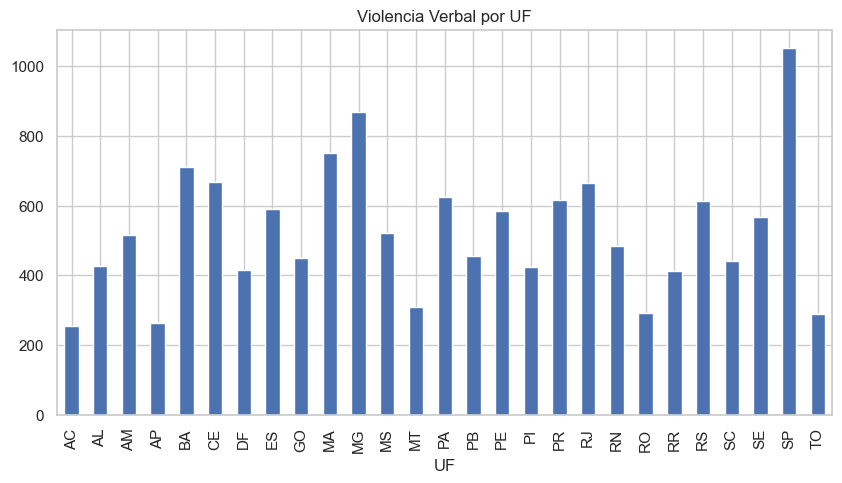

In [75]:
# Plot de blocos total de cada tipo de violencia por UF com o eixo y acertando os valores para compreender entre 0 e 1

# Violencia Verbal
vverbal1.groupby("UF").size().plot(kind='bar', title='Violencia Verbal por UF', figsize=(10, 5))


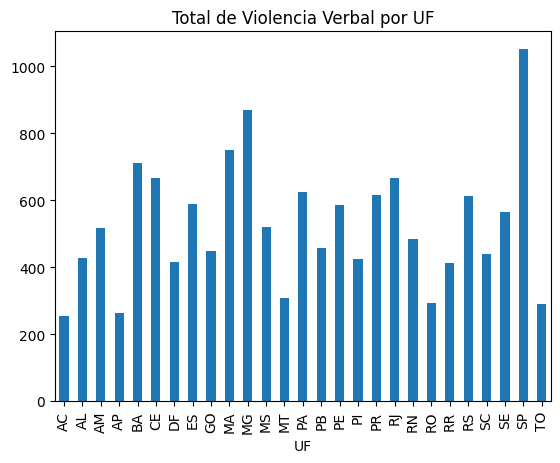

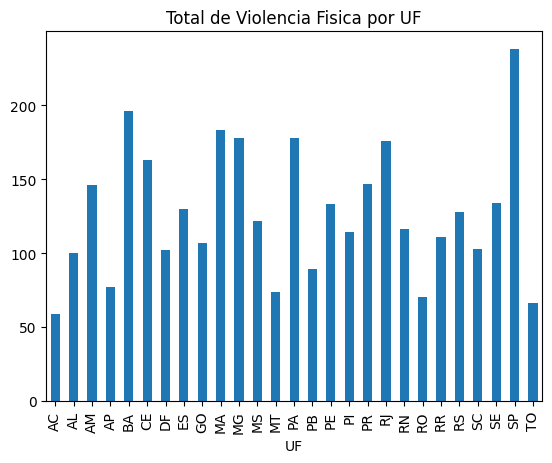

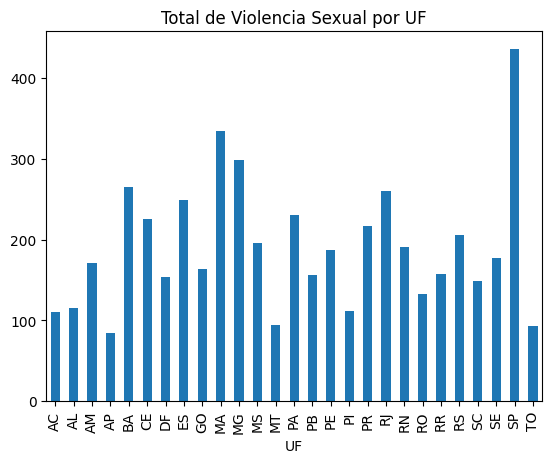

In [27]:
# Plot de blocos total de cada tipo de violencia por UF
from matplotlib import pyplot as plt


for i, ds in enumerate(ds_violencias1):
    # Substitui i por nome do dataset
    nome = ''
    if i == 0:
        nome = 'Violencia Verbal'
    elif i == 1:
        nome = 'Violencia Fisica'
    elif i == 2:
        nome = 'Violencia Sexual'
    ds.groupby('UF').size().plot(kind='bar', title=f'Total de {nome} por UF')
    plt.show()

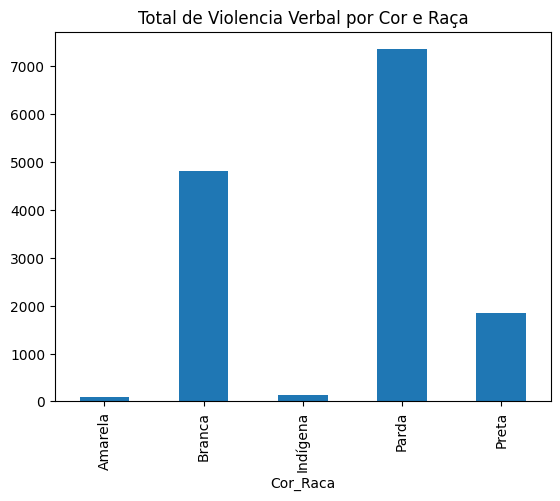

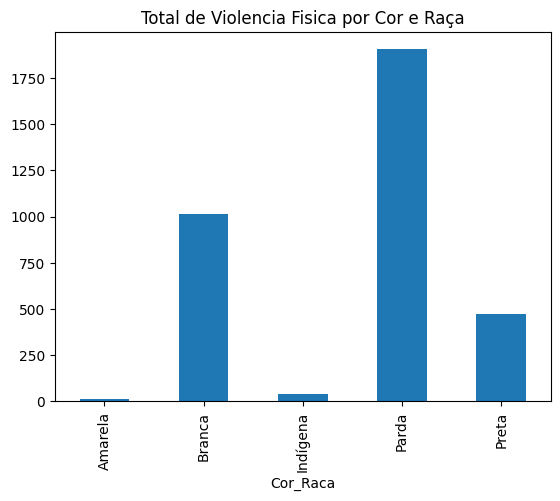

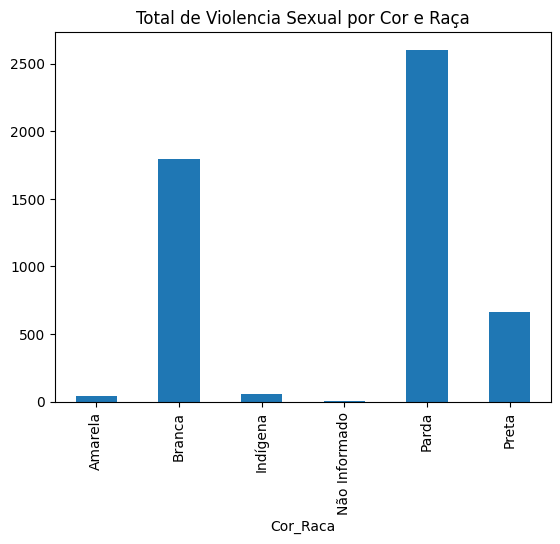

In [28]:
# Plot de blocos total de cada tipo de violencia por cor e raça
for i, ds in enumerate(ds_violencias1):
    # Substitui i por nome do dataset
    nome = ''
    if i == 0:
        nome = 'Violencia Verbal'
    elif i == 1:
        nome = 'Violencia Fisica'
    elif i == 2:
        nome = 'Violencia Sexual'
    ds.groupby('Cor_Raca').size().plot(kind='bar', title=f'Total de {nome} por Cor e Raça')
    plt.show()

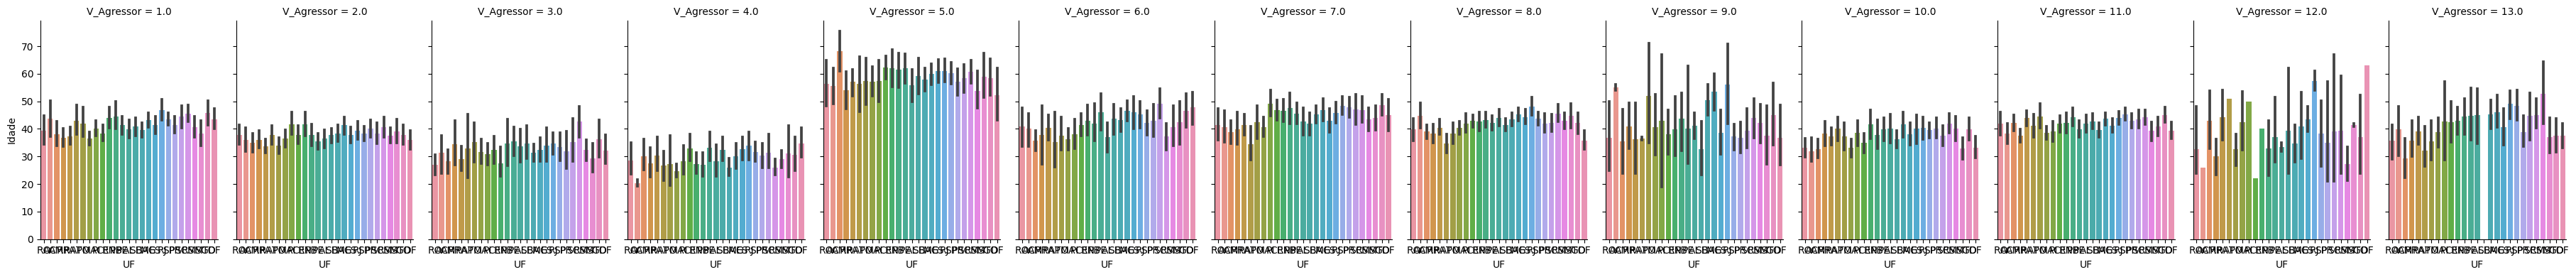

In [29]:
g = sns.catplot(x="UF", y="Idade", col="V_Agressor", data=vverbal1, kind="bar", height=4, aspect=.7)


# Analise Exploratória de Dados do subconjunto Violencia Verbal

In [30]:
violencia_eda = v[colunas_selecionadas]
violencia_eda = substitur_nome_colunas(violencia_eda, novo_nome_colunas)

In [31]:
vverbal_eda = violencia_eda[colunas_verbal]
vverbal_eda

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
0,11,6,55,1,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
9,11,4,19,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
10,11,8,45,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
18,11,1,58,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
19,11,2,28,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
279366,53,3,54,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
279369,53,2,44,4,1.0,1.0,2.0,1.0,1.0,2.0,2.0,7.0
279370,53,4,32,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
279375,53,3,54,4,2.0,1.0,2.0,2.0,2.0,2.0,1.0,5.0


In [32]:
vverbal_eda.corr()

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
UF,1.000000,-0.125685,0.059447,-0.253635,0.004364,-0.006687,-0.019305,0.010232,0.005503,-0.011837,0.008929,-0.006222
Qtd_Moradores,-0.125685,1.000000,-0.329335,0.105584,-0.011913,-0.024533,-0.008454,-0.018913,-0.017477,0.008713,-0.066086,-0.018173
Idade,0.059447,-0.329335,1.000000,-0.100034,0.090451,0.124341,0.087223,0.077914,0.067758,-0.022971,0.056368,-0.057436
Cor_Raca,-0.253635,0.105584,-0.100034,1.000000,-0.023168,-0.016547,-0.002459,-0.021920,-0.018518,-0.008808,-0.027744,-0.011199
V_Ofensa,0.004364,-0.011913,0.090451,-0.023168,1.000000,0.681874,0.228680,0.449642,0.282392,0.154418,-0.024285,0.055518
V_Grito,-0.006687,-0.024533,0.124341,-0.016547,0.681874,1.000000,0.220997,0.458347,0.292026,0.159173,0.160558,0.183772
V_Rede_Social,-0.019305,-0.008454,0.087223,-0.002459,0.228680,0.220997,1.000000,0.262502,0.191161,0.058056,-0.001039,-0.214832
V_Ameaca,0.010232,-0.018913,0.077914,-0.021920,0.449642,0.458347,0.262502,1.000000,0.323060,0.100262,0.049581,0.017340
V_Destruiu,0.005503,-0.017477,0.067758,-0.018518,0.282392,0.292026,0.191161,0.323060,1.000000,0.102876,0.166321,0.114518
V_N_Ocorrencia,-0.011837,0.008713,-0.022971,-0.008808,0.154418,0.159173,0.058056,0.100262,0.102876,1.000000,0.197061,0.150202


<AxesSubplot: >

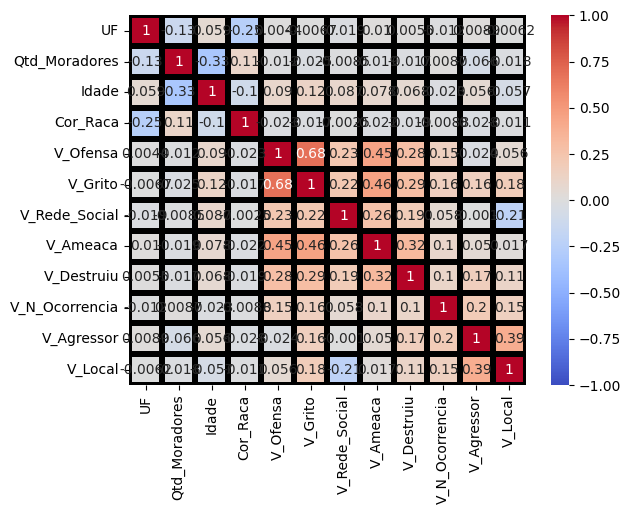

In [33]:
sns.heatmap(vverbal_eda.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [34]:
vverbal_eda.corrwith(vverbal_eda['Idade'])

UF                0.059447
Qtd_Moradores    -0.329335
Idade             1.000000
Cor_Raca         -0.100034
V_Ofensa          0.090451
V_Grito           0.124341
V_Rede_Social     0.087223
V_Ameaca          0.077914
V_Destruiu        0.067758
V_N_Ocorrencia   -0.022971
V_Agressor        0.056368
V_Local          -0.057436
dtype: float64

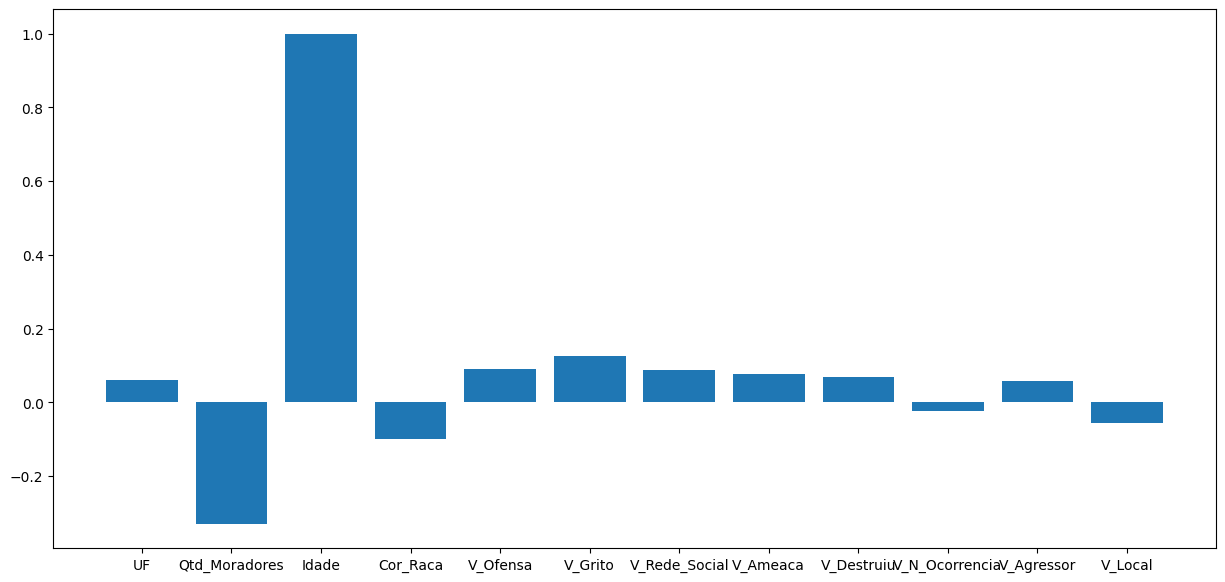

In [35]:
plt.figure(figsize=(15,7))
plt.bar(dict(vverbal_eda.corrwith(vverbal_eda['Idade'])).keys(), dict(vverbal_eda.corrwith(vverbal_eda['Idade'])).values())
plt.show()

In [36]:
vverbal_eda[['Idade', 'V_Grito']].corr()

,Idade,V_Grito
Idade,1.000000,0.124341
V_Grito,0.124341,1.000000


In [37]:
# para cada coluna verifica os dados ausentes
print('Valores ausentes por coluna:')
for col in vverbal_eda.columns:
    print(f'{col}: {any(vverbal_eda[col].isna())}')

Valores ausentes por coluna:
UF: False
Qtd_Moradores: False
Idade: False
Cor_Raca: False
V_Ofensa: False
V_Grito: False
V_Rede_Social: False
V_Ameaca: False
V_Destruiu: False
V_N_Ocorrencia: True
V_Agressor: True
V_Local: True


In [38]:
# Se existem dados ausentes na coluna, imprime uma tabela da seguinte forma: Primeira coluna Total de dados na coluna - Segunda coluna Total de dados ausentes na coluna - Terceira coluna Porcentagem de dados ausentes na coluna - Quarta coluna Total de dados não ausentes na coluna - Quinta coluna Porcentagem de dados não ausentes na coluna. Cada linha representa uma coluna com dados ausentes.
t = PrettyTable(['Coluna', 'Total', 'Ausentes', 'Ausentes (%)', 'Não Ausentes', 'Não Ausentes (%)'])
for col in vverbal_eda.columns:
    if any(vverbal_eda[col].isna()):
        t.add_row([col, len(vverbal_eda[col]), vverbal_eda[col].isna().sum(), round(vverbal_eda[col].isna().sum() / len(vverbal_eda[col]) * 100, 2), len(vverbal_eda[col]) - vverbal_eda[col].isna().sum(), round((len(vverbal_eda[col]) - vverbal_eda[col].isna().sum()) / len(vverbal_eda[col]) * 100, 2)])
print(t)

+----------------+-------+----------+--------------+--------------+------------------+
|     Coluna     | Total | Ausentes | Ausentes (%) | Não Ausentes | Não Ausentes (%) |
+----------------+-------+----------+--------------+--------------+------------------+
| V_N_Ocorrencia | 88531 |  74012   |     83.6     |    14519     |       16.4       |
|   V_Agressor   | 88531 |  74012   |     83.6     |    14519     |       16.4       |
|    V_Local     | 88531 |  74012   |     83.6     |    14519     |       16.4       |
+----------------+-------+----------+--------------+--------------+------------------+


# Dados Desbalanceados

In [39]:
vverbal_eda['V_Grito'].value_counts()

2.0    77504
1.0    11027
Name: V_Grito, dtype: int64

In [78]:
vverbal_eda1 = vverbal_eda.copy()
altera_nome_estado(vverbal_eda1)

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
0,RO,6,55,1,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
9,RO,4,19,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
10,RO,8,45,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
18,RO,1,58,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
19,RO,2,28,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
279366,DF,3,54,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
279369,DF,2,44,4,1.0,1.0,2.0,1.0,1.0,2.0,2.0,7.0
279370,DF,4,32,4,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
279375,DF,3,54,4,2.0,1.0,2.0,2.0,2.0,2.0,1.0,5.0


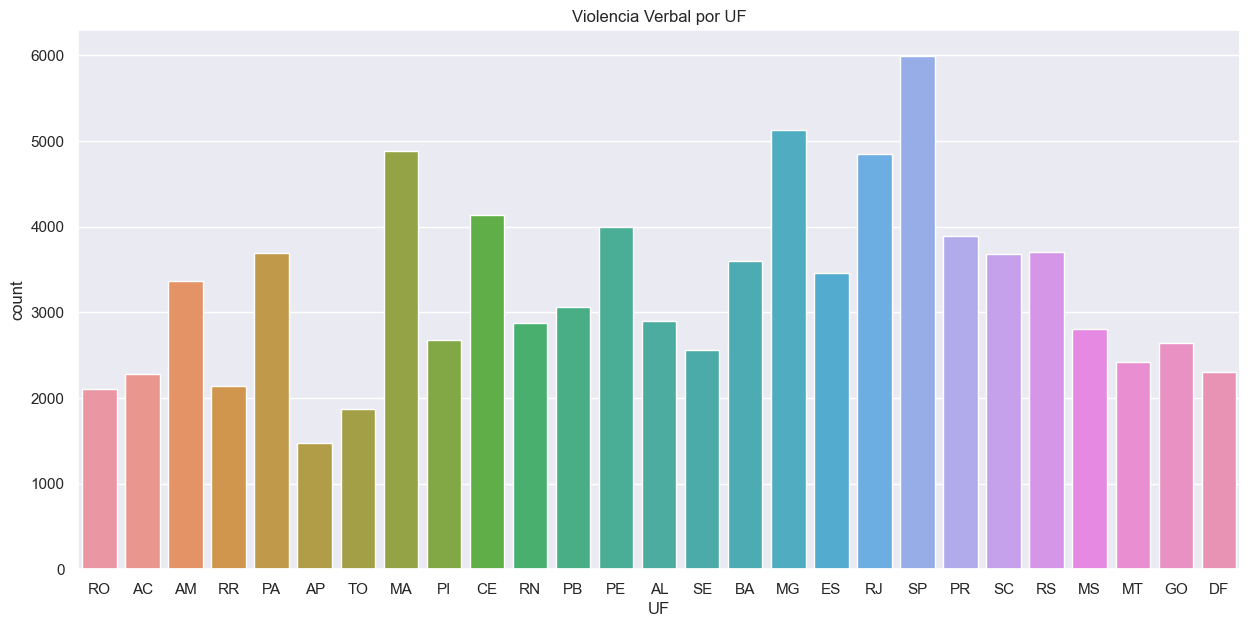

In [79]:
sns.set()
plt.title('Violencia Verbal por UF')
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='UF', data=vverbal_eda1)
plt.show()

In [80]:
vverbal_eda.std()

UF                11.660259
Qtd_Moradores      1.489862
Idade             17.118721
Cor_Raca           1.417872
V_Ofensa           0.301351
V_Grito            0.330216
V_Rede_Social      0.147063
V_Ameaca           0.227336
V_Destruiu         0.147283
V_N_Ocorrencia     0.693797
V_Agressor         3.564652
V_Local            1.999098
dtype: float64

In [81]:
# Porcentagem da variação de idade por UF
vverbal_eda1.groupby('UF')['Idade'].std() / vverbal_eda1.groupby('UF')['Idade'].mean() * 100

UF
AC    38.124215
AL    36.655451
AM    37.869577
AP    38.295606
BA    35.540533
CE    37.439761
DF    36.290518
ES    34.924530
GO    34.448379
MA    38.325332
MG    34.508863
MS    35.801477
MT    35.791693
PA    37.994709
PB    36.410770
PE    36.184421
PI    36.746202
PR    35.194166
RJ    34.363179
RN    37.161657
RO    36.605129
RR    37.700054
RS    34.121181
SC    34.049706
SE    35.442099
SP    35.251360
TO    36.979297
Name: Idade, dtype: float64

In [82]:
# Os Estados com maior variação de idade são:
vverbal_eda1.groupby('UF')['Idade'].std().sort_values(ascending=False).head(5)

UF
CE    17.679054
RN    17.562209
PI    17.468188
MA    17.363359
RJ    17.338488
Name: Idade, dtype: float64

In [83]:
# Os estados com maior indice de violencia verbal do tipo grito são:
vverbal_eda1.groupby('UF')['V_Grito'].mean().sort_values(ascending=False).head(5)

UF
AC    1.908892
SC    1.907508
MT    1.899298
RO    1.898008
RJ    1.896473
Name: V_Grito, dtype: float64

# Distribuição de Dados

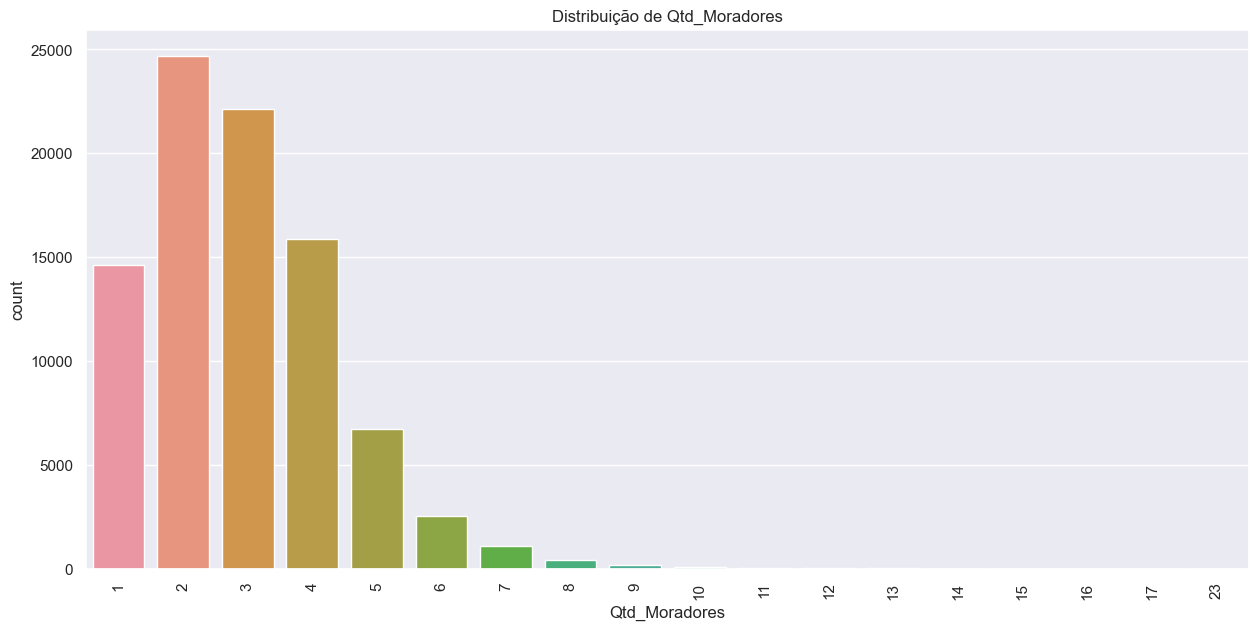

Frequente:  2


In [84]:
def dist_Attributo(df, coluna):
    plt.figure(figsize=(15,7))
    plt.title(f'Distribuição de {coluna}')
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=coluna)
    plt.show()
    print('Frequente: ', df[coluna].mode()[0])
    
dist_Attributo(vverbal_eda, 'Qtd_Moradores')

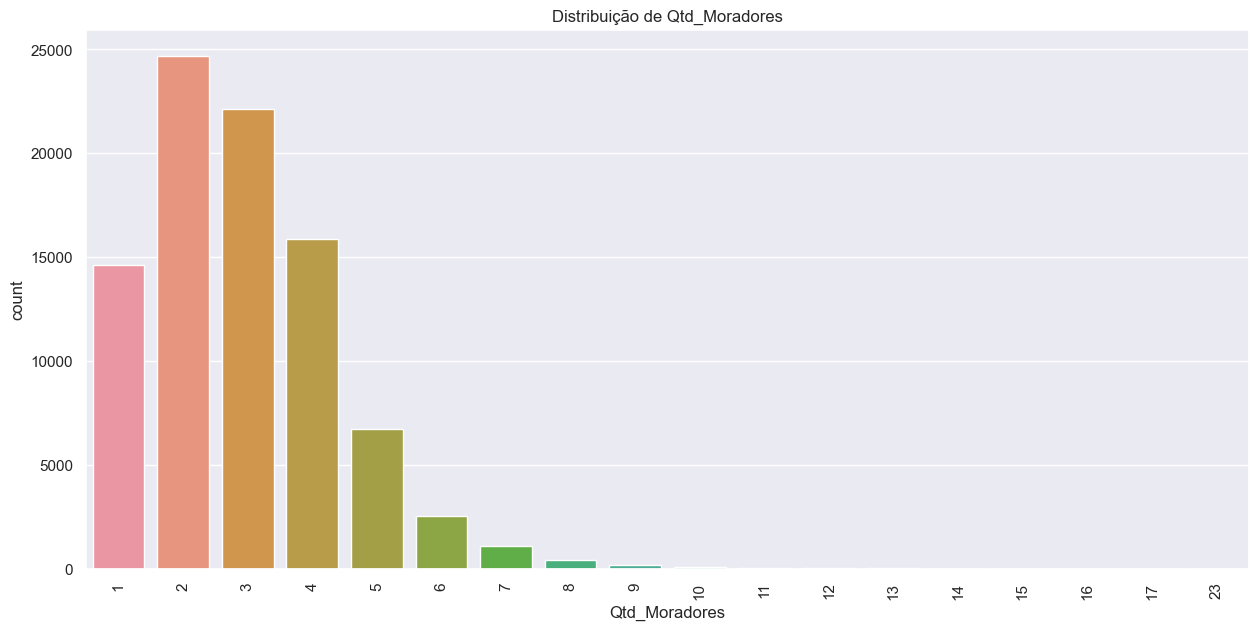

Frequente:  2


In [85]:
# Distribuição de dados da quantidade de moradores com o eixo y acertando os valores entre 0 e 1
def dist_Attributo_norm(df, coluna):
    plt.figure(figsize=(15,7))
    plt.title(f'Distribuição de {coluna}')
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=coluna)
    plt.show()
    print('Frequente: ', df[coluna].mode()[0])
    
dist_Attributo_norm(vverbal_eda, 'Qtd_Moradores')


In [86]:
colunas_booleanas = ['V_Ofensa', 'V_Grito', 'V_Rede_Social', 'V_Ameaca', 'V_Destruiu']
altera_booleanos(vverbal_eda1, colunas_booleanas)
altera_nome_cor_raca(vverbal_eda1)

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
0,RO,6,55,Branca,False,False,False,False,False,NaN,NaN,NaN
9,RO,4,19,Parda,False,False,False,False,False,NaN,NaN,NaN
10,RO,8,45,Preta,False,False,False,False,False,NaN,NaN,NaN
18,RO,1,58,Preta,False,False,False,False,False,NaN,NaN,NaN
19,RO,2,28,Parda,False,False,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
279366,DF,3,54,Parda,False,False,False,False,False,NaN,NaN,NaN
279369,DF,2,44,Parda,True,True,False,True,True,2.0,2.0,7.0
279370,DF,4,32,Parda,False,False,False,False,False,NaN,NaN,NaN
279375,DF,3,54,Parda,False,True,False,False,False,2.0,1.0,5.0


Qtd_Moradores : 1.1214888420430071
Idade : 0.30489076286881606
V_N_Ocorrencia : -0.43339406498932553
V_Agressor : -0.3076727574725347
V_Local : 0.6107580022482227


<Figure size 2000x700 with 0 Axes>

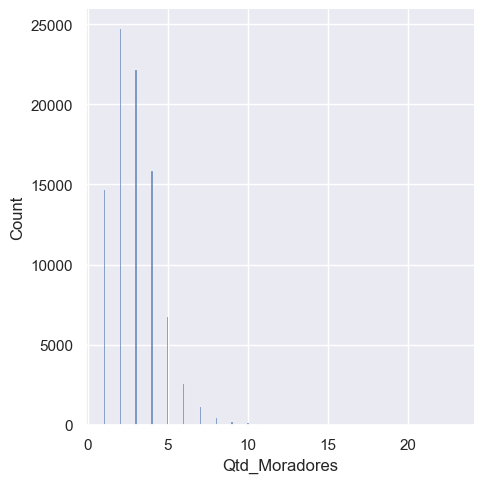

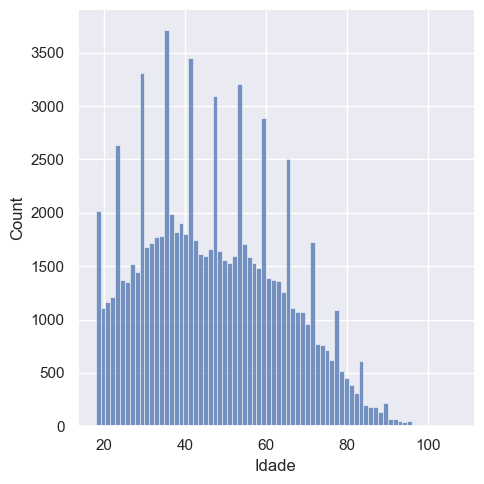

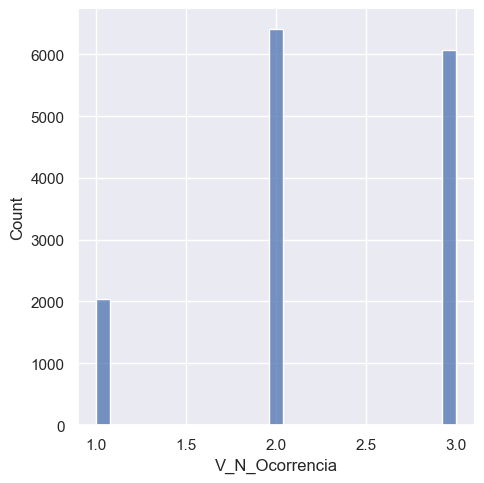

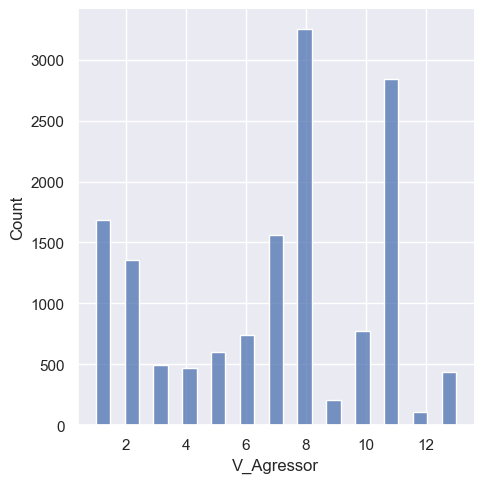

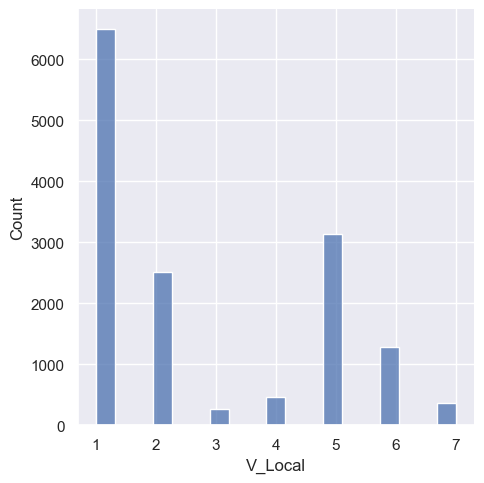

In [87]:
# Verificar a distribuição normal entre as variaveis contínuas

plt.figure(figsize=(20,7))
j = 1
for i in vverbal_eda1.columns:
    if vverbal_eda1[i].dtypes == 'int64' or vverbal_eda1[i].dtypes == 'float64':
        sns.displot(vverbal_eda1[i])
        j += 1
        print(vverbal_eda1[i].name, ':', vverbal_eda1[i].skew())
plt.show()

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1013179911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


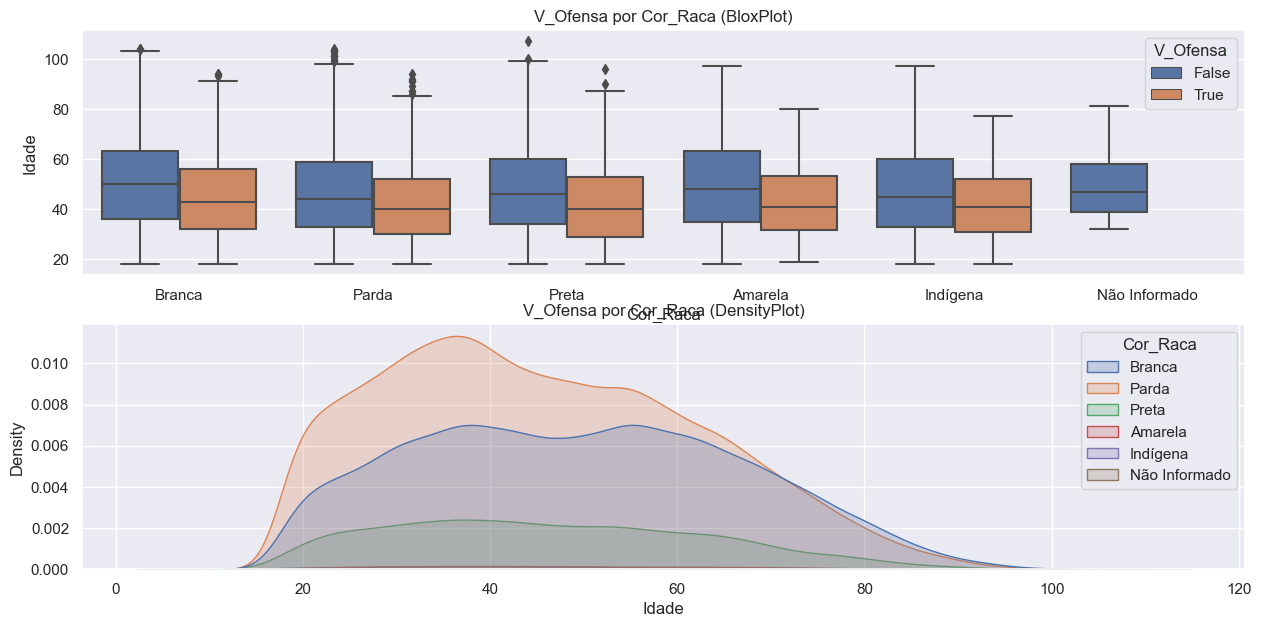

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1013179911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


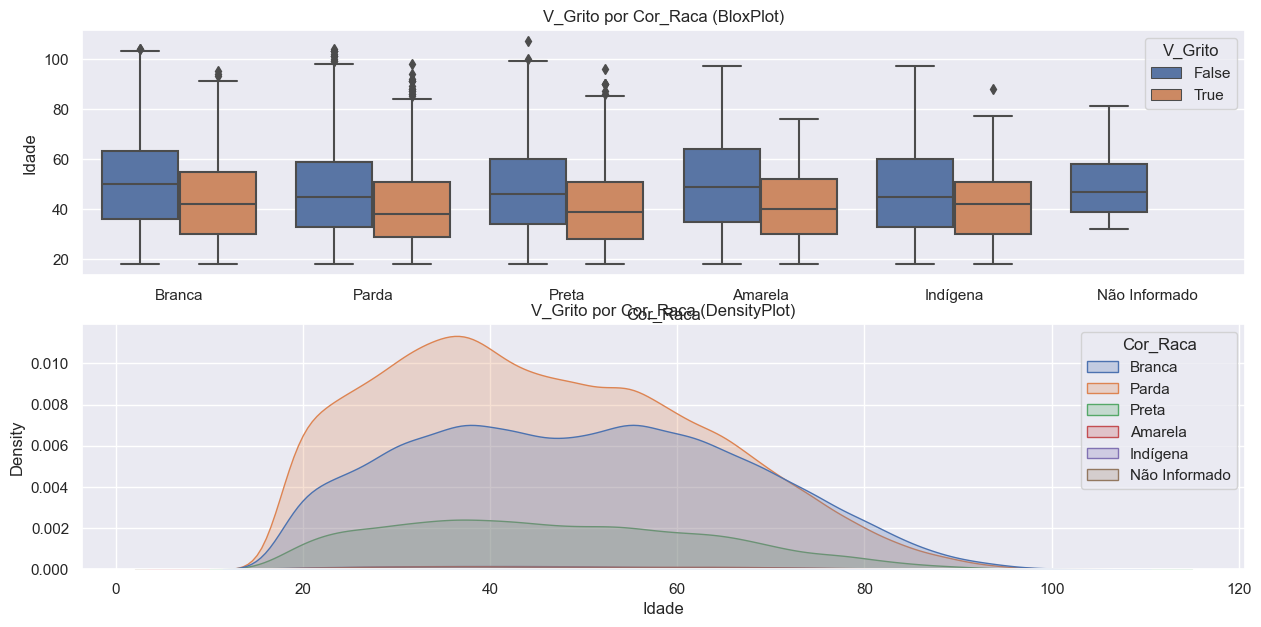

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1013179911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


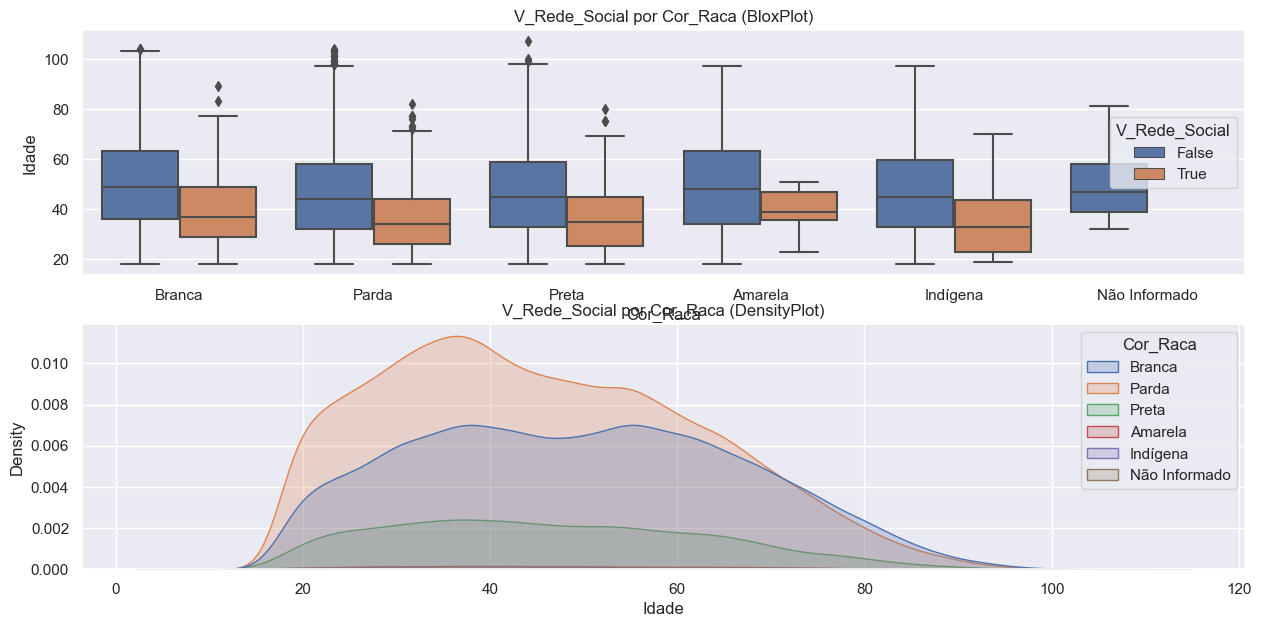

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1013179911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


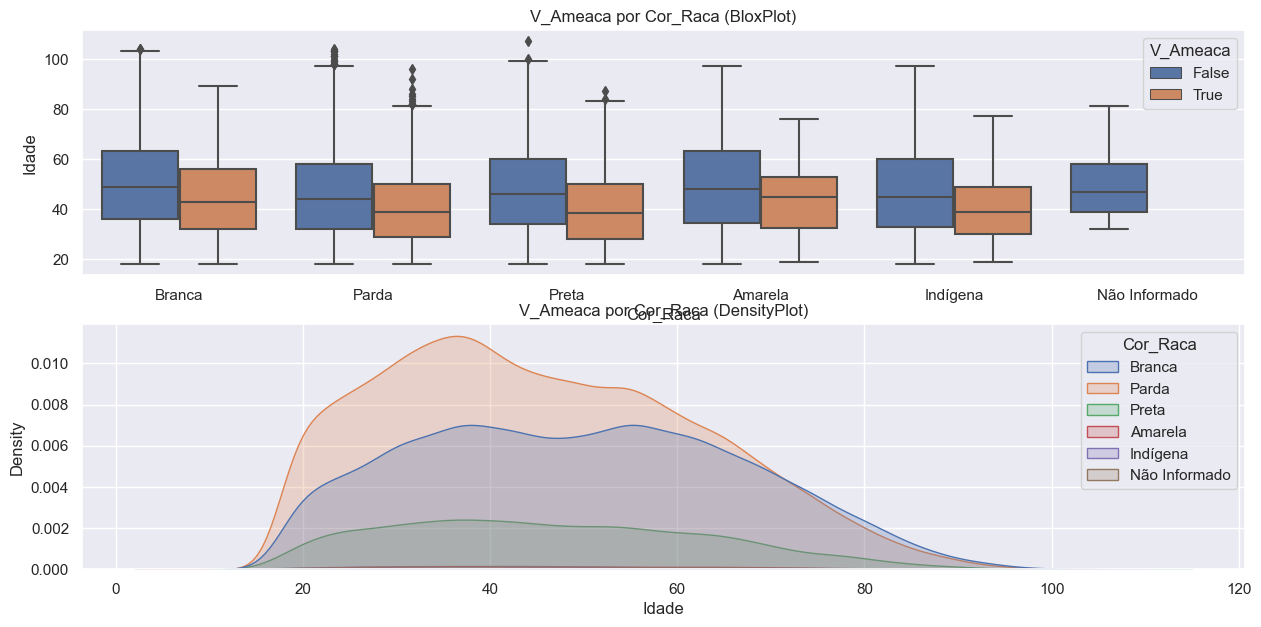

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\1013179911.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


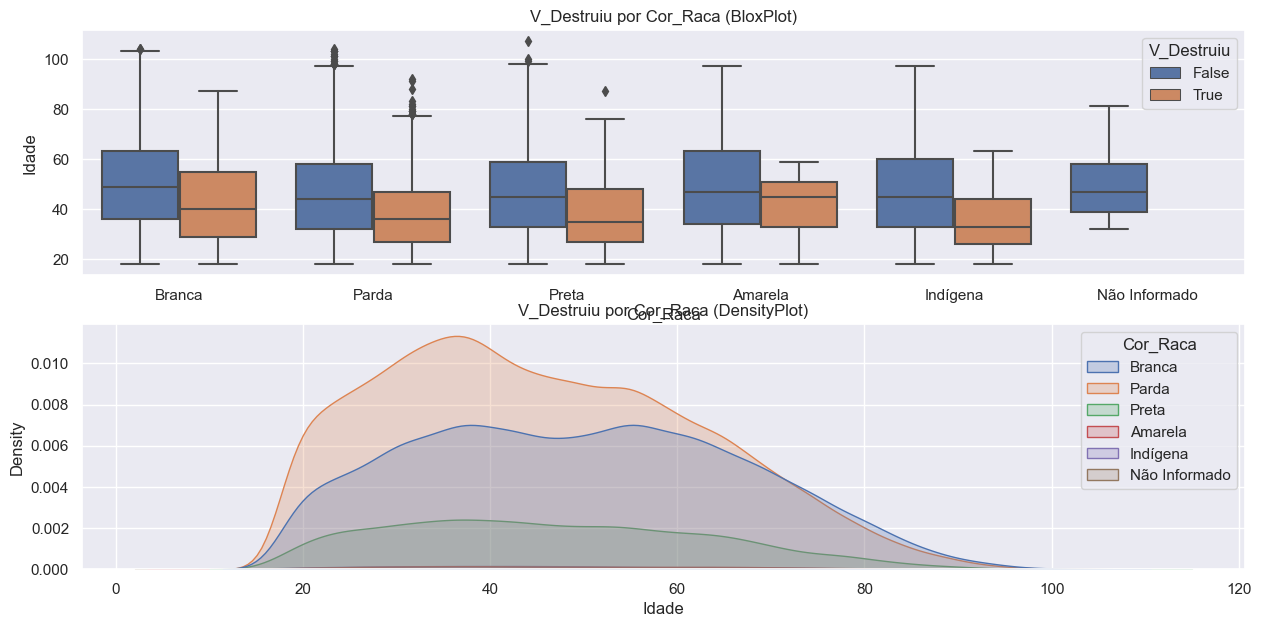

In [88]:
# Boxplot para cada tipo de violencia verbal comparando cor e raça com idade

for i in colunas_booleanas:
    sns.set(rc={'figure.figsize':(15,7)})
    plt.plot(figsize=(2,1))
    #Boxplot
    plt.subplot(2,1,1)
    bp_ax = sns.boxplot(x='Cor_Raca', y='Idade', data=vverbal_eda1, hue=i)
    bp_ax.set_title(f'{i} por Cor_Raca (BloxPlot)')
    
    # Função Densidade de Probabilidade
    plt.subplot(2,1,2)
    dp_ax = sns.kdeplot(data=vverbal_eda1, x='Idade', hue='Cor_Raca', fill=True)
    dp_ax.set_title(f'{i} por Cor_Raca (DensityPlot)')
    plt.show()

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\3849383640.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


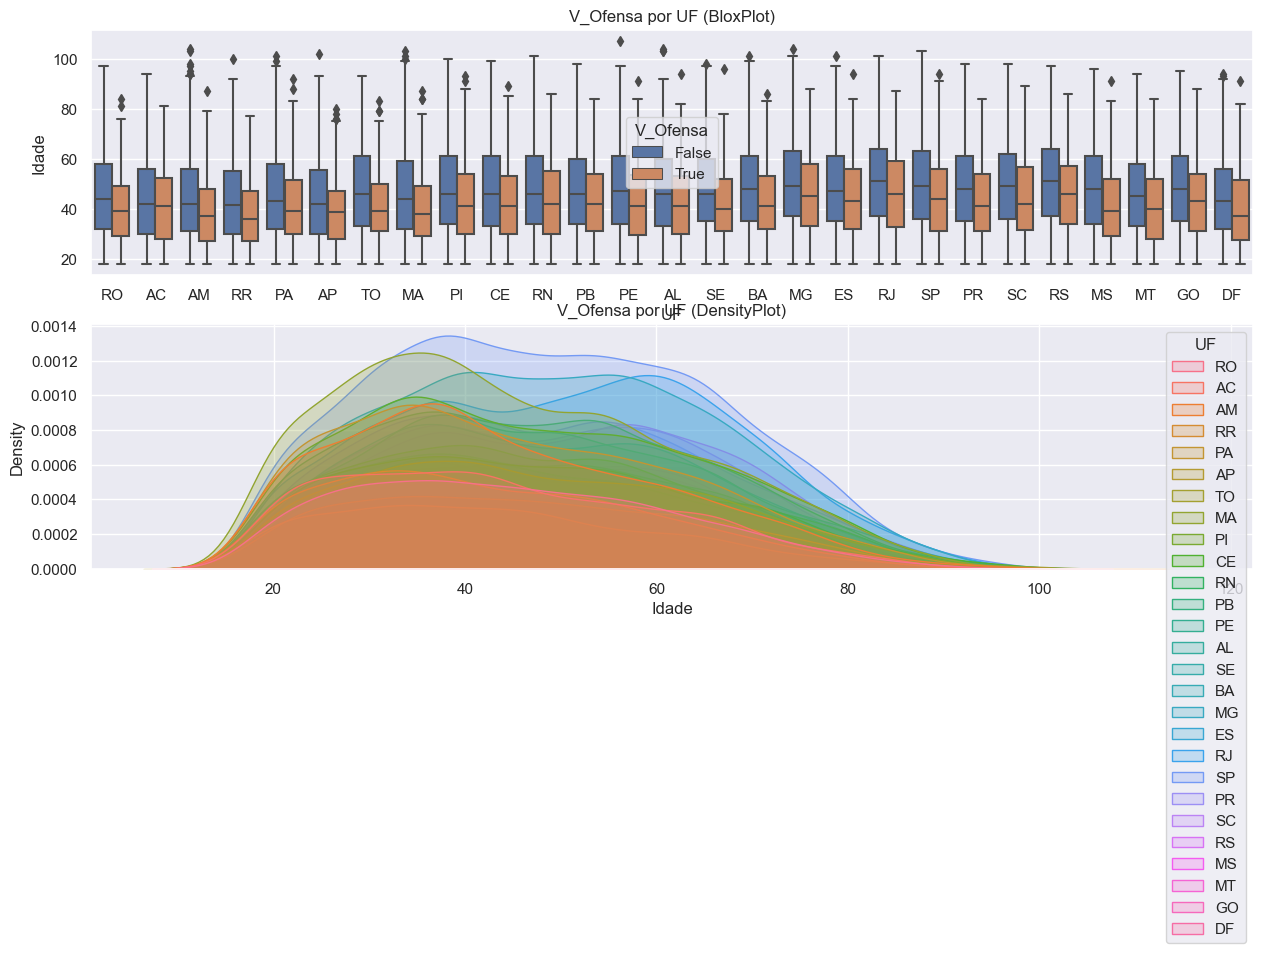

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\3849383640.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


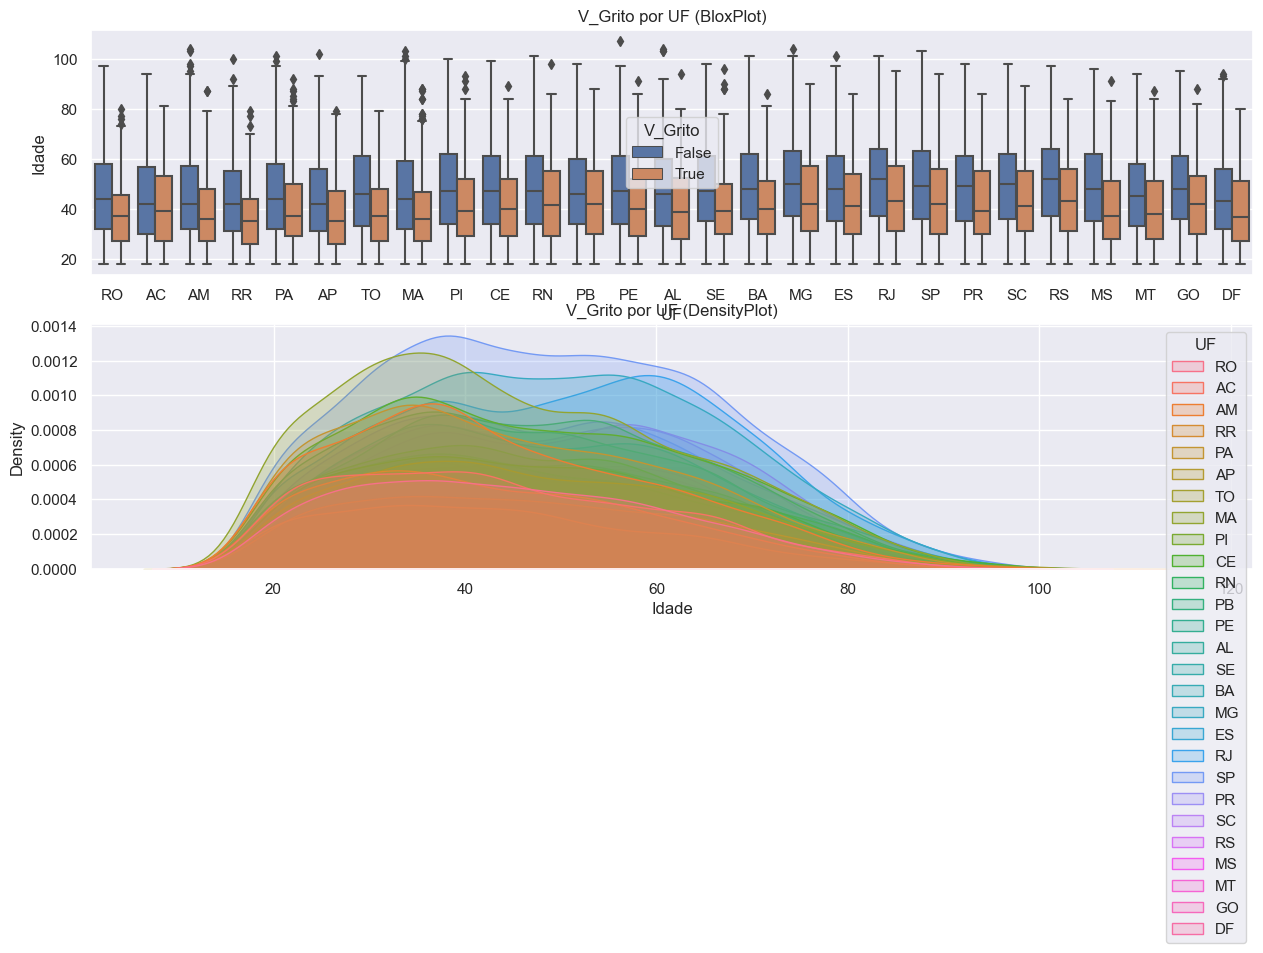

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\3849383640.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


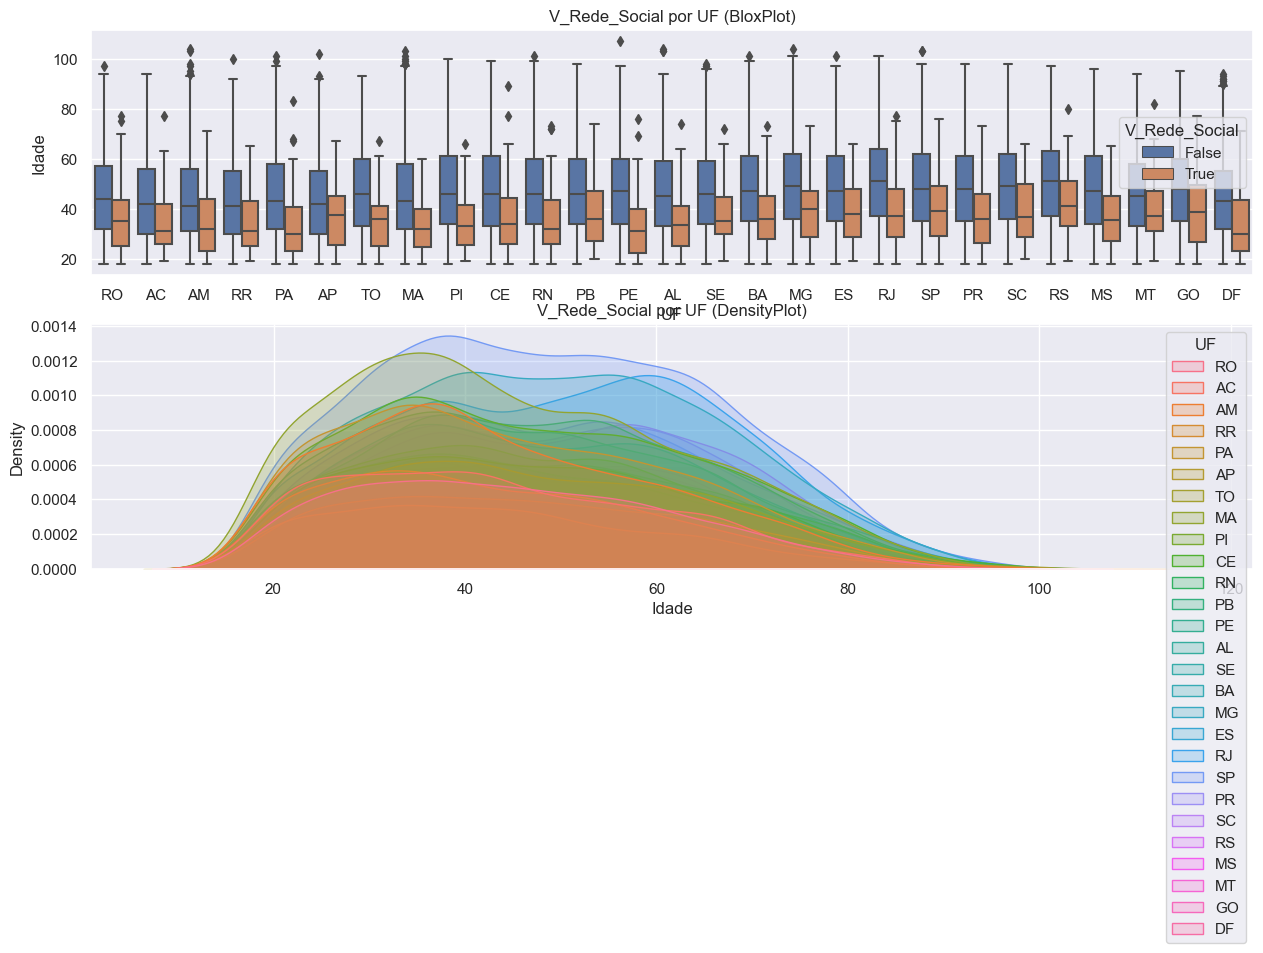

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\3849383640.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


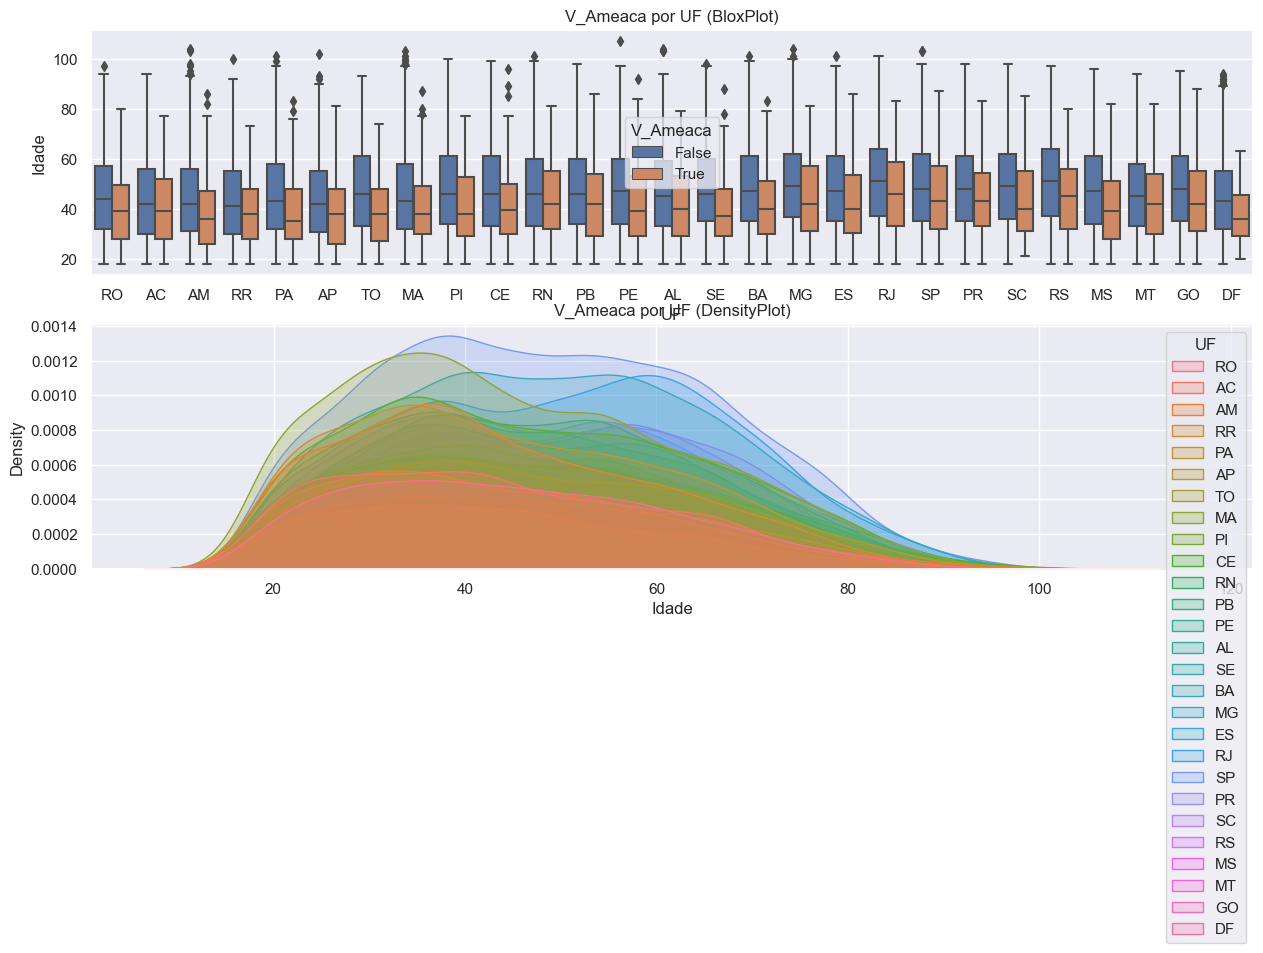

C:\Users\E00774\AppData\Local\Temp\ipykernel_17972\3849383640.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


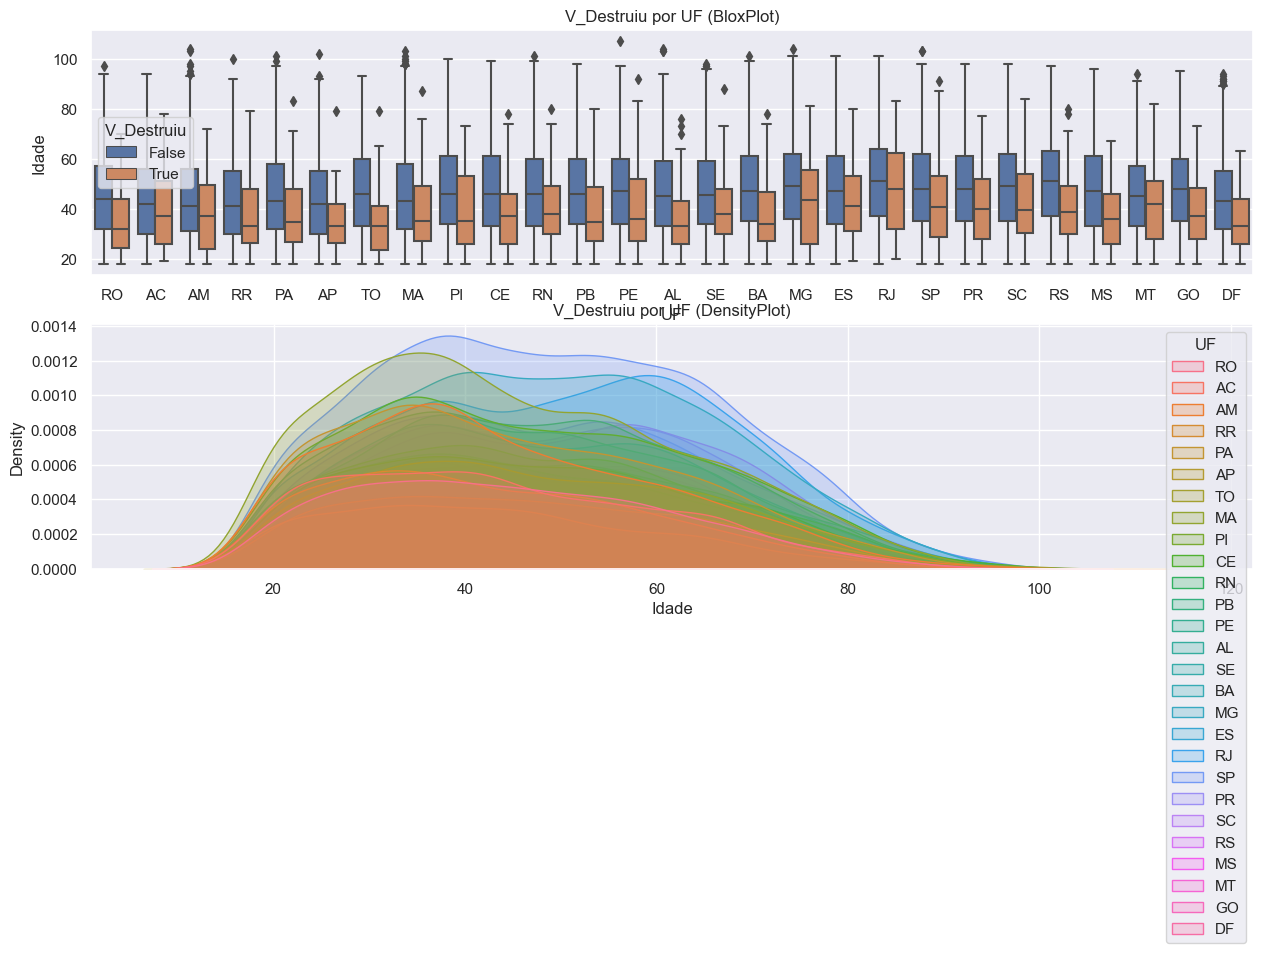

In [89]:
# Boxplot para cada tipo de violencia verbal comparando uf com idade

for i in colunas_booleanas:
    sns.set(rc={'figure.figsize':(15,7)})
    plt.plot(figsize=(2,1))
    #Boxplot
    plt.subplot(2,1,1)
    bp_ax = sns.boxplot(x='UF', y='Idade', data=vverbal_eda1, hue=i)
    bp_ax.set_title(f'{i} por UF (BloxPlot)')
    
    # Função Densidade de Probabilidade
    plt.subplot(2,1,2)
    dp_ax = sns.kdeplot(data=vverbal_eda1, x='Idade', hue='UF', fill=True)
    dp_ax.set_title(f'{i} por UF (DensityPlot)')
    plt.show()

In [90]:
vverbal_eda1

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
0,RO,6,55,Branca,False,False,False,False,False,NaN,NaN,NaN
9,RO,4,19,Parda,False,False,False,False,False,NaN,NaN,NaN
10,RO,8,45,Preta,False,False,False,False,False,NaN,NaN,NaN
18,RO,1,58,Preta,False,False,False,False,False,NaN,NaN,NaN
19,RO,2,28,Parda,False,False,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
279366,DF,3,54,Parda,False,False,False,False,False,NaN,NaN,NaN
279369,DF,2,44,Parda,True,True,False,True,True,2.0,2.0,7.0
279370,DF,4,32,Parda,False,False,False,False,False,NaN,NaN,NaN
279375,DF,3,54,Parda,False,True,False,False,False,2.0,1.0,5.0


In [91]:
# Substituir os codigos da coluna V_N_Ocorrencia por sua descrição
coluna_ocorrencia = {1: 'Muitas vezes', 2: 'Algumas vezes', 3: 'Uma vez'}
def altera_ocorrencia(df, coluna_ocorrencia):
    for k, v in coluna_ocorrencia.items():
        df.loc[df['V_N_Ocorrencia'] == int(k), 'V_N_Ocorrencia'] = v
        return df
    
vverbal_eda1 = altera_ocorrencia(vverbal_eda1, coluna_ocorrencia)

# Substituir os codigos da coluna V_Agressor por sua descrição
coluna_agressor = {'01': 'Cônjuge ou companheiro(a)', '02': 'Ex-cônjuge ou ex-companheiro(a)', '03': 'Parceiro(a), namorado(a), ex-parceiro(a) ou ex-namorado(a)', '04': 'Pai, mãe, padrasto ou madrasta', '05': 'Filho(a), enteado(a)', '06': 'Irmão(ã)', '07': 'Outro parente', '08': 'Amigo(a)/colega(a) ou vizinho(a)', '09': 'Empregado(a) em geral', '10': 'Patrão/Patroa/Chefe', '11': 'Pessoa desconhecida', '12': 'Policial', '13': 'Outro'}
def altera_agressor(df, coluna, coluna_agressor):
    for k, v in coluna_agressor.items():
        df.loc[df[coluna] == str(k), coluna] = v
        return df
    
vverbal_eda1 = altera_agressor(vverbal_eda1, 'V_Agressor', coluna_agressor)

# Substituir os codigos da coluna V_Local por sua descrição
coluna_local = {1: 'Residencia', 2: 'Trabalho', 3: 'Escola, faculdade ou outro estabelecimento de ensino', 4: 'Bar, restaurante ou similar', 5: 'Via pública ou outro local público', 6: 'Internet/Redes Socias/Celular', 7: 'Outro'}
def altera_local(df, coluna, coluna_local):
    for k, v in coluna_local.items():
        df.loc[df[coluna] == int(k), coluna] = v
        return df
    
vverbal_eda1 = altera_local(vverbal_eda1, 'V_Local', coluna_local)

In [92]:
# Cria a tabela de Descrição Estatística dos atributos
 # Coluna Atributo
 # Coluna Tipo
 # Coluna Valor Mínimo se for numérico senao 'Não se aplica'
 # Coluna Valor Máximo se for numérico senao 'Não se aplica'
 # Coluna Média se for numérico senao 'Não se aplica'
 # Coluna Desvio Padrão se for numérico senao 'Não se aplica'
 # Coluna Moda se for numérico senao 'Não se aplica'
 # Coluna Distribuição se for numérico senao 'Não se aplica'
 # Coluna Dados Ausentes se possuir dados ausentes exibe o total senao exibe '-'
 
tipos = {'UF': 'Qualitativo Politomica', 'Idade': 'Quantitativo Discreto', 'Cor_Raca': 'Qualitativo Politomica', 'Qtd_Moradores': 'Quantitativo Discreto', 'V_Ofensa': 'Qualitativo Dicotomica', 'V_Grito': 'Qualitativo Dicotomica', 'V_Rede_Social': 'Qualitativo Dicotomica', 'V_Ameaca': 'Qualitativo Dicotomica', 'V_Destruiu': 'Qualitativo Dicotomica', 'V_N_Ocorrencia': 'Qualitativo Politomica', 'V_Agressor': 'Qualitativo Politomica', 'V_Local': 'Qualitativo Politomica'}

t = PrettyTable(['Atributo', 'Tipo', 'Valor Mínimo', 'Valor Máximo', 'Média', 'Desvio Padrão', 'Moda', 'Distribuição', 'Dados Ausentes'])

for col in vverbal_eda1.columns:
    if vverbal_eda1[col].dtype == 'int64' or vverbal_eda1[col].dtype == 'float64':
        tipo = tipos[col]
        minimo = vverbal_eda1[col].min()
        maximo = vverbal_eda1[col].max()
        media = vverbal_eda1[col].mean()
        desvio = vverbal_eda1[col].std()
        moda = vverbal_eda1[col].mode()[0]
        distribuicao = 'Normal'
        if vverbal_eda1[col].isnull().sum() > 0:
            ausente = vverbal_eda1[col].isnull().sum()
        else:
            ausente = '-'
    else:
        tipo = tipos[col]
        minimo = 'Não se aplica'
        maximo = 'Não se aplica'
        media = 'Não se aplica'
        desvio = 'Não se aplica'
        moda = vverbal_eda1[col].mode()[0]
        distribuicao = 'Não se aplica'
        if vverbal_eda1[col].isnull().sum() > 0:
            ausente = vverbal_eda1[col].isnull().sum()
        else:
            ausente = '-'
    t.add_row([col, tipo, minimo, maximo, media, desvio, moda, distribuicao, ausente])

print(t)

+----------------+------------------------+---------------+---------------+--------------------+--------------------+------------+---------------+----------------+
|    Atributo    |          Tipo          |  Valor Mínimo |  Valor Máximo |       Média        |   Desvio Padrão    |    Moda    |  Distribuição | Dados Ausentes |
+----------------+------------------------+---------------+---------------+--------------------+--------------------+------------+---------------+----------------+
|       UF       | Qualitativo Politomica | Não se aplica | Não se aplica |   Não se aplica    |   Não se aplica    |     SP     | Não se aplica |       -        |
| Qtd_Moradores  | Quantitativo Discreto  |       1       |       23      |  2.91216635980617  | 1.4898618408047146 |     2      |     Normal    |       -        |
|     Idade      | Quantitativo Discreto  |       18      |      107      | 47.188013238300705 | 17.11872071414976  |     37     |     Normal    |       -        |
|    Cor_Raca   

# Normalização

In [93]:
# Transforma todos os booleanos em 0 e 1 sendo false 0 e true 1
vverbal_eda1['V_Ofensa'] = vverbal_eda1['V_Ofensa'].astype(int)
vverbal_eda1['V_Grito'] = vverbal_eda1['V_Grito'].astype(int)
vverbal_eda1['V_Rede_Social'] = vverbal_eda1['V_Rede_Social'].astype(int)
vverbal_eda1['V_Ameaca'] = vverbal_eda1['V_Ameaca'].astype(int)
vverbal_eda1['V_Destruiu'] = vverbal_eda1['V_Destruiu'].astype(int)

In [94]:
vverbal_eda1

,UF,Qtd_Moradores,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,V_N_Ocorrencia,V_Agressor,V_Local
0,RO,6,55,Branca,0,0,0,0,0,NaN,NaN,NaN
9,RO,4,19,Parda,0,0,0,0,0,NaN,NaN,NaN
10,RO,8,45,Preta,0,0,0,0,0,NaN,NaN,NaN
18,RO,1,58,Preta,0,0,0,0,0,NaN,NaN,NaN
19,RO,2,28,Parda,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
279366,DF,3,54,Parda,0,0,0,0,0,NaN,NaN,NaN
279369,DF,2,44,Parda,1,1,0,1,1,2.0,2.0,7.0
279370,DF,4,32,Parda,0,0,0,0,0,NaN,NaN,NaN
279375,DF,3,54,Parda,0,1,0,0,0,2.0,1.0,5.0


<AxesSubplot: title={'center': 'V_Ofensa true por UF'}, xlabel='UF', ylabel='V_Ofensa'>

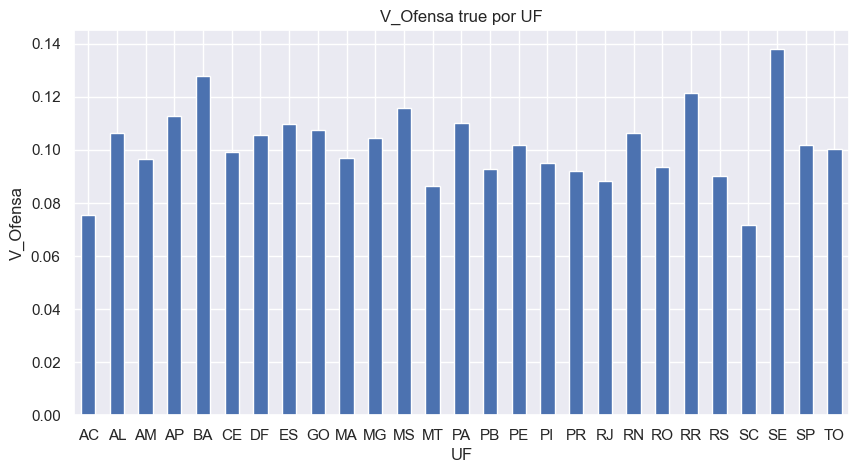

In [95]:
# Grafico de barras V_Ofensa true por UF normalizando o eixo y para acertar os valores entre 0 e 1
vverbal_eda1.groupby(['UF'])['V_Ofensa'].mean().plot(kind='bar', figsize=(10, 5), title='V_Ofensa true por UF', ylabel='V_Ofensa', xlabel='UF', rot=0)




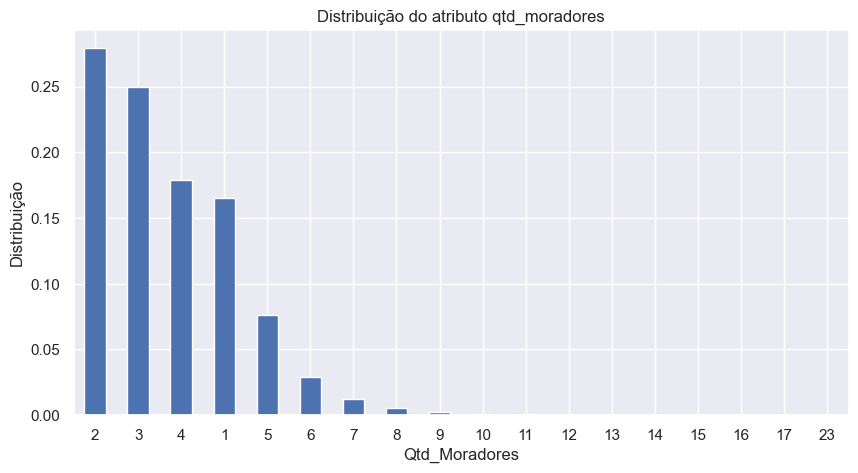

In [96]:
# Distribuição do atributo qtd_moradores com o eixo y em escala de 0 a 1
def distribuicao(df, coluna, titulo, x, y):
    df[coluna].value_counts(normalize=True).plot(kind='bar', figsize=(10, 5), title=titulo, ylabel=y, xlabel=x, rot=0)
    
distribuicao(vverbal_eda1, 'Qtd_Moradores', 'Distribuição do atributo qtd_moradores', 'Qtd_Moradores', 'Distribuição')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f48a9a50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f48a8040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2012efb50>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1f48a8460>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f48a8f40>,
 'means': []}

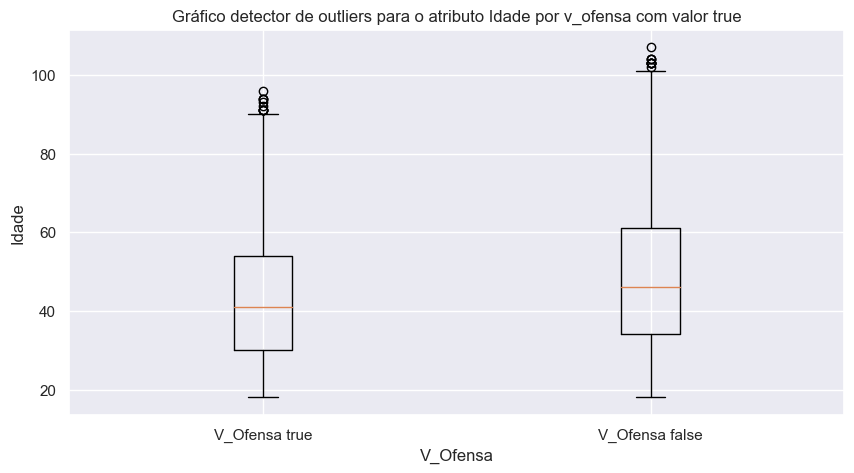

In [98]:
# Gráfico detector de outliers para o atributo Idade por v_ofensa com valor true

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title('Gráfico detector de outliers para o atributo Idade por v_ofensa com valor true')
ax.set_ylabel('Idade')
ax.set_xlabel('V_Ofensa')
ax.boxplot([vverbal_eda1[vverbal_eda1['V_Ofensa'] == 1]['Idade'], vverbal_eda1[vverbal_eda1['V_Ofensa'] == 0]['Idade']], labels=['V_Ofensa true', 'V_Ofensa false'])

<AxesSubplot: title={'center': 'Gráfico detector de outliers para o atributo Idade com v_ofensa no parametro hue e o eixo y em escala de 0 a 1'}, xlabel='V_Ofensa', ylabel='Idade'>

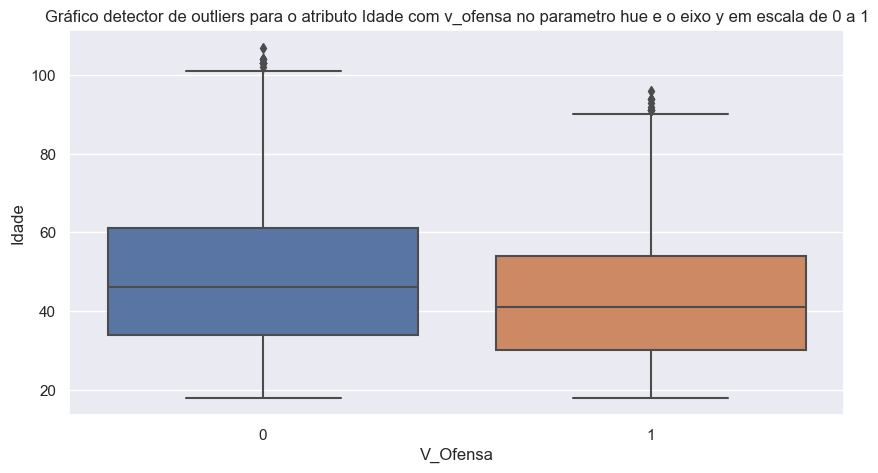

In [102]:
# Gráfico detector de outliers para o atributo Idade com v_ofensa no parametro hue e o eixo y em escala de 0 a 1

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title('Gráfico detector de outliers para o atributo Idade com v_ofensa no parametro hue e o eixo y em escala de 0 a 1')
ax.set_ylabel('Idade')
ax.set_xlabel('V_Ofensa')
sns.boxplot(x='V_Ofensa', y='Idade', data=vverbal_eda1, ax=ax)
